In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [12]:
CRSP = pd.read_csv('CRSP_1985-2019.csv')
CRSP

C:\Users\zhang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,6,9,18,19,49,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PERMNO,date,NAMEENDT,SHRCD,EXCHCD,SICCD,NCUSIP,TICKER,COMNAM,SHRCLS,TSYMBOL,NAICS,PRIMEXCH,TRDSTAT,SECSTAT,PERMCO,ISSUNO,HEXCD,HSICCD,CUSIP,DCLRDT,DLAMT,DLPDT,DLSTCD,NEXTDT,PAYDT,RCRDDT,SHRFLG,HSICMG,HSICIG,DISTCD,DIVAMT,FACPR,FACSHR,ACPERM,ACCOMP,SHRENDDT,NWPERM,DLRETX,DLPRC,DLRET,TRTSCD,NMSIND,MMCNT,NSDINX,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,CFACPR,CFACSHR,ALTPRC,SPREAD,ALTPRCDT,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn
0,10000,19851231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7952,10396,3,3990,68391610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.56250,NaN,19860107.0,NaN,0.043061,0.040080,0.028021,0.026355,0.045061
1,10000,19860131,19861203.0,10.0,3.0,3990,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,OMFGA,NaN,Q,A,R,7952,10396,3,3990,68391610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19860429.0,NaN,NaN,NaN,NaN,1.0,1.0,13.0,2.0,-2.50000,-4.43750,-4.37500,1771.0,C,NaN,NaN,3680.0,1.0,1.0,-4.37500,0.250,19860131.0,C,0.009829,0.008006,0.044071,0.043082,0.002367
2,10000,19860228,NaN,10.0,3.0,3990,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,OMFGA,NaN,Q,A,R,7952,10396,3,3990,68391610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.25000,-4.37500,-3.25000,828.0,-0.257143,NaN,NaN,3680.0,1.0,1.0,-3.25000,0.250,19860228.0,-0.257143,0.072500,0.068190,0.060381,0.058938,0.071489
3,10000,19860331,NaN,10.0,3.0,3990,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,OMFGA,NaN,Q,A,R,7952,10396,3,3990,68391610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,8.0,2.0,-3.25000,-4.43750,-4.43750,1078.0,0.365385,NaN,NaN,3680.0,1.0,1.0,-4.43750,0.125,19860331.0,0.365385,0.053885,0.051360,0.047192,0.045679,0.052794
4,10000,19860430,NaN,10.0,3.0,3990,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,OMFGA,NaN,Q,A,R,7952,10396,3,3990,68391610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19860730.0,NaN,NaN,NaN,NaN,1.0,1.0,8.0,2.0,-4.00000,-4.31250,-4.00000,957.0,-0.098592,NaN,NaN,3793.0,1.0,1.0,-4.00000,0.250,19860430.0,-0.098592,-0.007903,-0.009633,0.016140,0.015141,-0.014148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162482,93436,20190830,NaN,11.0,3.0,9999,88160R10,TSLA,TESLA INC,NaN,TSLA,336111.0,Q,A,R,53453,66252,3,9999,88160R10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211.39999,238.30000,225.61000,1340932.0,-0.066222,225.56000,225.62000,179127.0,1.0,1.0,225.61000,NaN,20190830.0,-0.066222,-0.020271,-0.022301,-0.040001,-0.041599,-0.018092
3162483,93436,20190930,NaN,11.0,3.0,9999,88160R10,TSLA,TESLA INC,NaN,TSLA,336111.0,Q,A,R,53453,66252,3,9999,88160R10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020.0,NaN,NaN,NaN,NaN,1.0,6.0,58.0,70.0,220.67999,247.10001,240.87000,1365915.0,0.067639,240.78000,240.84000,180000.0,1.0,1.0,240.87000,NaN,20190930.0,0.067639,0.016024,0.014162,0.017680,0.015359,0.017181
3162484,93436,20191031,NaN,11.0,3.0,9999,88160R10,TSLA,TESLA INC,NaN,TSLA,336111.0,Q,A,R,53453,66252,3,9999,88160R10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191231.0,NaN,NaN,NaN,NaN,1.0,6.0,58.0,70.0,231.42999,328.13000,314.92001,2351125.0,0.307427,314.94000,315.07999,180245.0,1.0,1.0,314.92001,NaN,20191031.0,0.307427,0.019265,0.018094,0.006291,0.005261,0.020432
3162485,93436,20191129,NaN,11.0,3.0,9999,88160R10,TSLA,TESLA INC,NaN,TSLA,336111.0,Q,A,R,53453,66252,3,9999,88160R10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,59.0,70.0,313.31000,359.51999,329.94000,1578851.0,0.047695,329.94000,330.04999,180245.0,1.0,1.0,329.94000,NaN,20191129.0,0.047695,0.034971,0.0

In [13]:
len(CRSP['PERMNO'].unique())

28357

In [7]:
CCM = pd.read_csv('CCM_Annual_1985-2019.csv')
company = pd.read_csv('company_status.csv', low_memory = False, index_col = 0)

C:\Users\zhang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,17,33,37,952,953,955,956,957,962,976,977,982) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
company

,PERMNO,TICKER,DLSTCD,bankrupt,date,year,quarter
0,10000,OMFGA,560.0,0,1987-06-30,1987,2
1,10001,EGAS,233.0,0,2017-08-31,2017,3
2,10002,BTFG,231.0,0,2013-02-28,2013,1
3,10003,GCBK,231.0,0,1995-12-29,1995,4
4,10005,WERC,560.0,0,1991-07-31,1991,3
...,...,...,...,...,...,...,...
28272,93432,JGBO,585.0,0,2011-05-31,2011,2
28273,93433,VLTC,584.0,0,2016-12-30,2016,4
28274,93434,SANW,100.0,0,2019-12-31,2019,4
28275,93435,SCEI,584.0,0,2012-05-31,2012,2


In [9]:
CCM

GVKEY LINKPRIM LIID LINKTYPE  LPERMNO  LPERMCO    LINKDT LINKENDDT  \
0         1001        P   01       LU    10015     6398  19830920  19860731   
1         1003        C   01       LU    10031     6672  19831207  19890816   
2         1003        C   01       LU    10031     6672  19831207  19890816   
3         1003        C   01       LU    10031     6672  19831207  19890816   
4         1003        C   01       LU    10031     6672  19831207  19890816   
...        ...      ...  ...      ...      ...      ...       ...       ...   
226564  326688        P    1       LC    17676    56329  20180502         E   
226565  326688        P    1       LC    17676    56329  20180502         E   
226566  327451        P    1       LC    17884    56407  20180618         E   
226567  328032        P    1       LC    18313    56612  20181210         E   
226568  328795        P    1       LC    18144    56541  20181101         E   

        datadate   fyear indfmt consol popsrc datafmt    tic      cusip  \
0       19851231  1985.0   INDL      C      D     STD  AMFD.  000165100   
1       19860131  1985.0   INDL      C      D     STD   ANTQ  000354100   
2       19870131  1986.0   INDL      C      D     STD   ANTQ  000354100   
3       19880131  1987.0   INDL      C      D     STD   ANTQ  000354100   
4       19890131  1988.0   INDL      C      D     STD   ANTQ  000354100   
...          ...     ...    ...    ...    ...     ...    ...        ...   
226564  20181231  2018.0   INDL      C      D     STD    NVT  G6700G107   
226565  20191231  2019.0   INDL      C      D     STD    NVT  G6700G107   
226566  20181231  2018.0   INDL      C      D     STD   GRIN  Y28895103   
226567  20181231  2018.0   INDL      C      D     STD   NMCI  Y62151108   
226568  20181231  2018.0   INDL      C      D     STD    ACA  039653100   

                              conm   acctchg acctstd acqmeth  adrr  ajex  ajp  \
0          A & M FOOD SERVICES INC       NaN      DS      AP   NaN   1.0  1.0   
1            A.A. IMPORTING CO INC       NaN      DS      AP   NaN   1.0  1.0   
2            A.A. IMPORTING CO INC       NaN      DS     NaN   NaN   1.0  1.0   
3            A.A. IMPORTING CO INC       NaN      DS     NaN   NaN   1.0  1.0   
4            A.A. IMPORTING CO INC       NaN      DS     NaN   NaN   1.0  1.0   
...                            ...       ...     ...     ...   ...   ...  ...   
226564          NVENT ELECTRIC PLC  ASU14-09      DU     NaN   NaN   1.0  1.0   
226565          NVENT ELECTRIC PLC  ASU16-02      DU     NaN   NaN   1.0  1.0   
226566           GRINDROD SHIPPING    IFRS15      DI     NaN   NaN   1.0  1.0   
226567  NAVIOS MARITIME CONTAINERS       NaN      DU     NaN   NaN   1.0  1.0   
226568                  ARCOSA INC  ASU14-09      DS      AP   NaN   1.0  1.0   

       bspr compst curcd curncd  currtr  curuscn final   fyr  ismod  ltcm  \
0       NaN     AA   USD    USD     1.0      NaN     Y  12.0    1.0   NaN   
1       NaN     AA   USD    USD     1.0      NaN     Y   1.0    1.0   NaN   
2       NaN    NaN   USD    USD     1.0      NaN     Y   1.0    1.0   NaN   
3       NaN    NaN   USD    USD     1.0      NaN     Y   1.0    1.0   NaN   
4       NaN    NaN   USD    USD     1.0      NaN     Y   1.0    1.0   NaN   
...     ...    ...   ...    ...     ...      ...   ...   ...    ...   ...   
226564  NaN    NaN   USD    USD     1.0      NaN     Y  12.0    1.0   1.0   
226565  NaN    NaN   USD    USD     1.0      NaN   NaN  12.0    1.0   NaN   
226566  NaN     AC   USD    USD     1.0      NaN     Y  12.0    1.0   9.0   
226567  NaN    NaN   USD    USD     1.0      NaN     Y  12.0    1.0   9.0   
226568  NaN     AA   USD    USD     1.0      NaN     Y  12.0    1.0   9.0   

        ogm  pddur  scf   src stalt  udpl  upd    apdedate       fdate  \
0       NaN   12.0  1.0  53.0   NaN   NaN  3.0         NaN         NaN   
1       NaN   12.0  2.0  53.0   NaN   NaN  3.0         NaN         NaN   
2       NaN   12.0  2.0  53.0   NaN   N

In [11]:
len(CCM['LPERMNO'].unique())

22884

In [14]:
company.rename(columns = {
    'date':'bankrupt_date'
    ,'year':'bankrupt_year'
    ,'quarter':'bankrupt_quarter'
}, inplace = True)
company

,PERMNO,TICKER,DLSTCD,bankrupt,bankrupt_date,bankrupt_year,bankrupt_quarter
0,10000,OMFGA,560.0,0,1987-06-30,1987,2
1,10001,EGAS,233.0,0,2017-08-31,2017,3
2,10002,BTFG,231.0,0,2013-02-28,2013,1
3,10003,GCBK,231.0,0,1995-12-29,1995,4
4,10005,WERC,560.0,0,1991-07-31,1991,3
...,...,...,...,...,...,...,...
28272,93432,JGBO,585.0,0,2011-05-31,2011,2
28273,93433,VLTC,584.0,0,2016-12-30,2016,4
28274,93434,SANW,100.0,0,2019-12-31,2019,4
28275,93435,SCEI,584.0,0,2012-05-31,2012,2


In [15]:
df = pd.merge(CCM, company, how = 'left',left_on='LPERMNO',right_on='PERMNO')

In [16]:
df

GVKEY LINKPRIM LIID LINKTYPE  LPERMNO  LPERMCO    LINKDT LINKENDDT  \
0         1001        P   01       LU    10015     6398  19830920  19860731   
1         1003        C   01       LU    10031     6672  19831207  19890816   
2         1003        C   01       LU    10031     6672  19831207  19890816   
3         1003        C   01       LU    10031     6672  19831207  19890816   
4         1003        C   01       LU    10031     6672  19831207  19890816   
...        ...      ...  ...      ...      ...      ...       ...       ...   
226564  326688        P    1       LC    17676    56329  20180502         E   
226565  326688        P    1       LC    17676    56329  20180502         E   
226566  327451        P    1       LC    17884    56407  20180618         E   
226567  328032        P    1       LC    18313    56612  20181210         E   
226568  328795        P    1       LC    18144    56541  20181101         E   

        datadate   fyear indfmt consol popsrc datafmt    tic      cusip  \
0       19851231  1985.0   INDL      C      D     STD  AMFD.  000165100   
1       19860131  1985.0   INDL      C      D     STD   ANTQ  000354100   
2       19870131  1986.0   INDL      C      D     STD   ANTQ  000354100   
3       19880131  1987.0   INDL      C      D     STD   ANTQ  000354100   
4       19890131  1988.0   INDL      C      D     STD   ANTQ  000354100   
...          ...     ...    ...    ...    ...     ...    ...        ...   
226564  20181231  2018.0   INDL      C      D     STD    NVT  G6700G107   
226565  20191231  2019.0   INDL      C      D     STD    NVT  G6700G107   
226566  20181231  2018.0   INDL      C      D     STD   GRIN  Y28895103   
226567  20181231  2018.0   INDL      C      D     STD   NMCI  Y62151108   
226568  20181231  2018.0   INDL      C      D     STD    ACA  039653100   

                              conm   acctchg acctstd acqmeth  adrr  ajex  ajp  \
0          A & M FOOD SERVICES INC       NaN      DS      AP   NaN   1.0  1.0   
1            A.A. IMPORTING CO INC       NaN      DS      AP   NaN   1.0  1.0   
2            A.A. IMPORTING CO INC       NaN      DS     NaN   NaN   1.0  1.0   
3            A.A. IMPORTING CO INC       NaN      DS     NaN   NaN   1.0  1.0   
4            A.A. IMPORTING CO INC       NaN      DS     NaN   NaN   1.0  1.0   
...                            ...       ...     ...     ...   ...   ...  ...   
226564          NVENT ELECTRIC PLC  ASU14-09      DU     NaN   NaN   1.0  1.0   
226565          NVENT ELECTRIC PLC  ASU16-02      DU     NaN   NaN   1.0  1.0   
226566           GRINDROD SHIPPING    IFRS15      DI     NaN   NaN   1.0  1.0   
226567  NAVIOS MARITIME CONTAINERS       NaN      DU     NaN   NaN   1.0  1.0   
226568                  ARCOSA INC  ASU14-09      DS      AP   NaN   1.0  1.0   

       bspr compst curcd curncd  currtr  curuscn final   fyr  ismod  ltcm  \
0       NaN     AA   USD    USD     1.0      NaN     Y  12.0    1.0   NaN   
1       NaN     AA   USD    USD     1.0      NaN     Y   1.0    1.0   NaN   
2       NaN    NaN   USD    USD     1.0      NaN     Y   1.0    1.0   NaN   
3       NaN    NaN   USD    USD     1.0      NaN     Y   1.0    1.0   NaN   
4       NaN    NaN   USD    USD     1.0      NaN     Y   1.0    1.0   NaN   
...     ...    ...   ...    ...     ...      ...   ...   ...    ...   ...   
226564  NaN    NaN   USD    USD     1.0      NaN     Y  12.0    1.0   1.0   
226565  NaN    NaN   USD    USD     1.0      NaN   NaN  12.0    1.0   NaN   
226566  NaN     AC   USD    USD     1.0      NaN     Y  12.0    1.0   9.0   
226567  NaN    NaN   USD    USD     1.0      NaN     Y  12.0    1.0   9.0   
226568  NaN     AA   USD    USD     1.0      NaN     Y  12.0    1.0   9.0   

        ogm  pddur  scf   src stalt  udpl  upd    apdedate       fdate  \
0       NaN   12.0  1.0  53.0   NaN   NaN  3.0         NaN         NaN   
1       NaN   12.0  2.0  53.0   NaN   NaN  3.0         NaN         NaN   
2       NaN   12.0  2.0  53.0   NaN   N

In [17]:
len(df['LPERMNO'].unique())

22884

#### Creating Ratios

In [236]:
df['ni'] # Net Income
# De-levered Net Income = Net Income + (1-t) * Interest Expense
df['sale'] # Net Sales
df['ebit'] # EBIT
df['ebitda'] # EBITDA
df['oancf'] # Operating Activities Net Cash Flow
df['ivncf'] # Investing Activities Net Cash Flow
df['fincf'] # Financing Activities Net Cash Flow
df['at'] # Assets - Total
df['dv'] # Cash Dividends (Cash Flow)
df['dltt'] # Long-Term Debt - Total
df['gp'] # Gross Profit
df['ch'] # Cash
df['lct'] # Current Liabilities - Total
df['seq'] # Stockholders' Equity - Total
df['wcap'] # Working Capital (Balance Sheet)
df['ap'] # Accounts Payable
df['rect'] # Receivables - Total
df['xint'] # Interest and Related Expense - Total
df['invt'] # Inventories - Total
df['cogs'] # Cost of Goods Sold
df['pi'] # Pre-tax Income
df['txt'] # Income Taxes - Total
df['lt'] # Liabilities - Total

# Activity
df['oancf/sale'] = df['oancf']/df['sale']
df['ebitda/sale'] = df['ebitda']/df['sale']
df['gp/sale'] = df['gp']/df['sale']
df['ros'] = df['ni']/df['sale'] # might need to convert to de-levered net income

# Profitability
df['gross_margin'] = (df['sale'] - df['cogs'])/df['sale']
df['oancf/seq'] = df['oancf']/df['seq']
df['oancf/at'] = df['oancf']/df['at']
df['ebit/seq'] = df['ebit']/df['seq']
df['ebit/at'] = df['ebit']/df['at']
df['ebitda/at'] = df['ebitda']/df['at']
df['roe'] = df['ni']/df['seq']
df['roa'] = df['ni']/df['at'] # might need to convert to de-levered net income
df['xint/sale'] = df['xint']/df['sale']
df['effective_tax_rate'] = df['txt']/df['pi']

# Financial Structures/Solvency
df['fin_lev'] = df['at']/df['seq']
df['dltt/seq'] = df['dltt']/df['seq']
df['dltt/at'] = df['dltt']/df['at']
df['wcap/at'] = df['wcap']/df['at']
df['wcap/at'] = df['wcap']/df['sale']

# Liquidity
df['ch/at'] = df['ch']/df['at']
df['at/lt'] = df['at']/df['lt']
df['lt/at'] = df['lt']/df['at']
df['invt/at'] = df['invt']/df['at']

# Efficiency/Turnover
df['asset_turnover'] = df['sale']/df['at']
df['invt_turnover'] = df['cogs']/df['invt']
df['invt/sale'] = df['invt']/df['sale']
df['receivable_turnover'] = df['sale']/df['rect']
df['payable_turnover'] = df['sale']/df['ap']


In [226]:
df.head()

,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,acctchg,acctstd,acqmeth,adrr,ajex,ajp,bspr,compst,curcd,curncd,currtr,curuscn,final,fyr,ismod,ltcm,ogm,pddur,scf,src,stalt,udpl,upd,apdedate,fdate,pdate,acchg,acco,accrt,acdo,aco,acodo,acominc,acox,acoxar,acqao,acqcshi,acqgdwl,acqic,acqintan,acqinvt,acqlntal,acqniintc,acqppe,acqsc,act,adpac,aedi,afudcc,afudci,aldo,am,amc,amdc,amgw,ano,ao,aocidergl,aociother,aocipen,aocisecgl,aodo,aol2,aoloch,aox,ap,apalch,apb,apc,apofs,aqa,aqc,aqd,aqeps,aqi,aqp,aqpl1,aqs,arb,arc,arce,arced,arceeps,artfs,at,aul3,autxr,balr,banlr,bast,bastr,batr,bcef,bclr,bcltbl,bcnlr,bcrbl,bct,bctbl,bctr,billexce,bkvlps,bltbl,ca,capr1,capr2,capr3,caps,capsft,capx,capxv,cb,cbi,cdpac,cdvc,ceiexbill,ceq,ceql,ceqt,cfbd,cfere,cfo,cfpdo,cga,cgri,cgti,cgui,ch,che,chech,chs,ci,cibegni,cicurr,cidergl,cimii,ciother,cipen,cisecgl,citotal,cld2,cld3,cld4,cld5,clfc,clfx,clg,clis,cll,cllc,clo,clrll,clt,cmp,cnltbl,cogs,cpcbl,cpdoi,cpnli,cppbl,cprei,crv,crvnli,cshfd,cshi,csho,cshpri,cshr,cshrc,cshrp,cshrso,cshrt,cshrw,cstk,cstkcv,cstke,dbi,dc,dclo,dcom,dcpstk,dcs,dcvsr,dcvsub,dcvt,dd,dd1,dd2,dd3,dd4,dd5,depc,derac,deralt,derhedgl,derlc,derllt,dfpac,dfs,dfxa,diladj,dilavx,dlc,dlcch,dltis,dlto,dltp,dltr,dltsub,dltt,dm,dn,do,donr,dp,dpacb,dpacc,dpacli,dpacls,dpacme,dpacnr,dpaco,dpacre,dpact,dpc,dpdc,dpltb,dpret,dpsc,dpstb,dptb,dptc,dptic,dpvieb,dpvio,dpvir,drc,drci,drlt,ds,dt,dtea,dted,dteeps,dtep,dudd,dv,dvc,dvdnp,dvintf,dvp,dvpa,dvpd,dvpdp,dvpibb,dvrpiv,dvrre,dvsco,dvt,dxd2,dxd3,dxd4,dxd5,ea,ebit,ebitda,eiea,emol,emp,epsfi,epsfx,epspi,epspx,esopct,esopdlt,esopnr,esopr,esopt,esub,esubc,excadj,exre,fatb,fatc,fatd,fate,fatl,fatn,fato,fatp,fca,fdfr,fea,fel,ffo,ffs,fiao,finaco,finao,fincf,finch,findlc,findlt,finivst,finlco,finlto,finnp,finrecc,finreclt,finrev,finxint,finxopr,fopo,fopox,fopt,fsrco,fsrct,fuseo,fuset,gbbl,gdwl,gdwlam,gdwlia,gdwlid,gdwlieps,gdwlip,geqrv,gla,glcea,glced,glceeps,glcep,gld,gleps,gliv,glp,govgr,govtown,gp,gphbl,gplbl,gpobl,gprbl,gptbl,gwo,hedgegl,iaeq,iaeqci,iaeqmi,iafici,iafxi,iafxmi,iali,ialoi,ialti,iamli,iaoi,iapli,iarei,iasci,iasmi,iassi,iasti,iatci,iati,iatmi,iaui,ib,ibadj,ibbl,ibc,ibcom,ibki,ibmii,icapt,idiis,idilb,idilc,idis,idist,idit,idits,iire,initb,intan,intano,intc,intpn,invch,invfg,invo,invofs,invreh,invrei,invres,invrm,invt,invwip,iobd,ioi,iore,ip,ipabl,ipc,iphbl,iplbl,ipobl,iptbl,ipti,ipv,irei,irent,irii,irli,irnli,irsi,iseq,iseqc,iseqm,isfi,isfxc,isfxm,isgr,isgt,isgu,islg,islgc,islgm,islt,isng,isngc,isngm,isotc,isoth,isotm,issc,issm,issu,ist,istc,istm,isut,itcb,itcc,itci,ivaco,ivaeq,ivao,ivch,ivgod,ivi,ivncf,ivpt,ivst,ivstch,lcabg,lcacl,lcacr,lcag,lcal,lcalt,lcam,lcao,lcast,lcat,lco,lcox,lcoxar,lcoxdr,lct,lcuacu,li,lif,lifr,lifrp,lloml,lloo,llot,llrci,llrcr,llwoci,llwocr,lno,lo,lol2,loxdr,lqpl1,lrv,ls,lse,lst,lt,lul3,mib,mibn,mibt,mii,mrc1,mrc2,mrc3,mrc4,mrc5,mrct,mrcta,msa,msvrv,mtl,nat,nco,nfsr,ni,niadj,nieci,niint,niintpfc,niintpfp,niit,nim,nio,nipfc,nipfp,nit,nits,nopi,nopio,np,npanl,npaore,nparl,npat,nrtxt,nrtxtd,nrtxteps,oancf,ob,oiadp,oibdp,opeps,opili,opincar,opini,opioi,opiri,opiti,oprepsx,optca,optdr,optex,optexd,optfvgr,optgr,optlife,optosby,optosey,optprcby,optprcca,optprcex,optprcey,optprcgr,optprcwa,optrfr,optvol,palr,panlr,patr,pcl,pclr,pcnlr,pctr,pdvc,pi,pidom,pifo,pll,pltbl,pnca,pncad,pncaeps,pncia,pncid,pncieps,pncip,pncwia,pncwid,pncwieps,pncwip,pnlbl,pnli,pnrsho,pobl,ppcbl,ppegt,ppenb,ppenc,ppenli,ppenls,ppenme,ppennr,ppeno,ppent,ppevbb,ppeveb,ppevo,ppevr,pppabl,ppphbl,pppobl,ppptbl,prc,prca,prcad,prcaeps,prebl,pri,prodv,prsho,prstkc,prstkcc,prstkpc,prvt,pstk,pstkc,pstkl,pstkn,pstkr,pstkrv,ptbl,ptran,pvcl,pvo,pvon,pvpl,pvt,pwoi,radp,ragr,rari,rati,rca,rcd,rceps,rcl,rcp,rdip,rdipa,rdipd,rdipeps,rdp,re,rea,reajo,recch,recco,recd,rect,recta,rectr,recub,ret,reuna,reunr,revt,ris,rll,rlo,rlp,rlri,rlt,rmum,rpag,rra,rrd,rreps,rrp,rstche,rstchelt,rvbci,rvbpi,rvbti,rvdo,rvdt,rveqt,rvlrv,rvno,rvnt,rvri,rvsi,rvti,r

#### 4.Feature Selection Algrithom

In [237]:
df.columns[990:]

Index(['DLSTCD', 'bankrupt', 'bankrupt_date', 'bankrupt_year',
       'bankrupt_quarter', 'oancf/sale', 'ebitda/sale', 'gp/sale', 'ros',
       'gross_margin', 'oancf/seq', 'oancf/at', 'ebit/seq', 'ebit/at',
       'ebitda/at', 'roe', 'roa', 'xint/sale', 'effective_tax_rate', 'fin_lev',
       'dltt/seq', 'dltt/at', 'wcap/at', 'ch/at', 'at/lt', 'lt/at', 'invt/at',
       'asset_turnover', 'invt_turnover', 'invt/sale', 'receivable_turnover',
       'payable_turnover'],
      dtype='object')

In [321]:
feature = df[['LPERMNO','sic','fyear','oancf/sale', 'ebitda/sale', 'gp/sale', 'ros',
       'gross_margin', 'oancf/seq', 'oancf/at', 'ebit/seq', 'ebit/at',
       'ebitda/at', 'roe', 'roa', 'xint/sale', 'effective_tax_rate', 'fin_lev',
       'dltt/seq', 'dltt/at', 'wcap/at', 'ch/at', 'at/lt', 'lt/at', 'invt/at',
       'asset_turnover', 'invt_turnover', 'invt/sale', 'receivable_turnover',
       'payable_turnover','bankrupt','bankrupt_year']]
feature

,LPERMNO,sic,fyear,oancf/sale,ebitda/sale,gp/sale,ros,gross_margin,oancf/seq,oancf/at,ebit/seq,ebit/at,ebitda/at,roe,roa,xint/sale,effective_tax_rate,fin_lev,dltt/seq,dltt/at,wcap/at,ch/at,at/lt,lt/at,invt/at,asset_turnover,invt_turnover,invt/sale,receivable_turnover,payable_turnover,bankrupt,bankrupt_year
0,10015,5812,1985.0,NaN,0.134708,0.748504,0.047883,0.748504,NaN,NaN,0.402490,0.132624,0.183492,0.197941,0.065223,0.032083,0.454699,3.034809,0.915015,0.301507,-0.187182,0.042740,1.491447,0.670490,0.018711,1.362147,18.308525,0.013737,1855.103448,24.531692,0.0,1986.0
1,10031,5712,1985.0,NaN,0.042871,0.427054,0.009757,0.427054,NaN,NaN,0.098725,0.047034,0.074124,0.035409,0.016869,0.011286,0.387013,2.099025,0.702476,0.334668,0.405763,0.000357,1.909898,0.523588,0.791351,1.729021,1.251829,0.457687,21.791892,22.130833,0.0,1989.0
2,10031,5712,1986.0,NaN,0.067809,0.473422,0.021841,0.473422,NaN,NaN,0.259185,0.132524,0.168792,0.106329,0.054367,0.012339,0.465993,1.955752,0.502816,0.257096,0.267489,0.016523,2.046296,0.488688,0.792746,2.489236,1.653464,0.318470,47.031088,28.588976,0.0,1989.0
3,10031,5712,1987.0,-0.026421,0.002971,0.363770,0.004979,0.363770,-0.129138,-0.061526,-0.052990,-0.025246,0.006919,0.024336,0.011595,0.013438,0.421169,2.098914,0.716734,0.341479,0.301906,0.029610,1.909989,0.523563,0.743174,2.328637,1.993541,0.319146,29.507109,52.392707,0.0,1989.0
4,10031,5712,1988.0,-0.064009,-0.112168,0.337966,-0.238905,0.337966,10.824742,-0.128993,22.536082,-0.268550,-0.226044,40.402062,-0.481450,0.022159,0.088499,-83.917526,-0.536082,0.006388,-0.052243,0.018550,0.988224,1.011916,0.717445,2.015233,1.859589,0.356011,15.273743,10.896048,0.0,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226564,17676,3440,2018.0,0.155177,0.208077,0.439646,0.104265,0.439646,0.127833,0.075450,0.135276,0.079843,0.101171,0.085892,0.050695,0.014095,0.141049,1.694280,0.345800,0.204099,0.173834,0.034924,2.440341,0.409779,0.066466,0.486217,4.099141,0.136700,6.493400,11.875536,0.0,2019.0
226565,17676,3440,2019.0,0.152586,0.207123,0.436751,0.101044,0.436751,0.129720,0.072474,0.138746,0.077517,0.098377,0.085902,0.047993,0.020281,0.134810,1.789894,0.403896,0.225654,0.152677,0.022930,2.265993,0.441308,NaN,0.474969,NaN,NaN,6.592881,11.779797,0.0,2019.0
226566,17884,4412,2018.0,-0.117109,-0.008253,0.078952,-0.064699,0.078952,-0.127725,-0.083462,-0.057859,-0.037808,-0.005882,-0.070563,-0.046110,0.020428,-0.072152,1.530333,0.328656,0.214761,0.207772,0.074835,2.885608,0.346547,0.024219,0.712687,27.103680,0.033982,4.746303,14.263525,0.0,2019.0
226567,18313,4412,2018.0,0.354754,0.502117,0.958991,0.094832,0.958991,0.260362,0.114887,0.157240,0.069384,0.162611,0.069599,0.030711,0.088000,0.000000,2.266237,1.006560,0.444155,-0.166120,0.041008,1.789742,0.558740,0.001449,0.323851,9.168614,0.004473,50.670072,37.470901,0.0,2019.0


In [322]:
def map_sic(sic):
    if 100 <= sic <= 999:
        return 'Agriculture, Forestry and Fishing'
    elif 1000 <= sic <= 1499:
        return 'Mining'
    elif 1500 <= sic <= 1799:
        return 'Construction'
    elif 1800 <= sic <= 1999:
        return 'Not Used'
    elif 2000 <= sic <= 3999:
        return 'Manufacturing'
    elif 4000 <= sic <= 4999:
        return 'Transportation, Communications, Electric, Gas and Sanitary service'
    elif 5000 <= sic <= 5199:
        return 'Wholesale Trade'
    elif 5200 <= sic <= 5999:
        return 'Retail Trade'
    elif 6000 <= sic <= 6799:
        return 'Finance, Insurance and Real Estate'
    elif 7000 <= sic <= 8999:
        return 'Services'
    elif 9100 <= sic <= 9729:
        return 'Public Administration'
    elif 9900 <= sic <= 9999:
        return 'Nonclassifiable'
    else:
        return sic

feature['sic'] = feature['sic'].apply(lambda x: map_sic(x))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [323]:
feature

,LPERMNO,sic,fyear,oancf/sale,ebitda/sale,gp/sale,ros,gross_margin,oancf/seq,oancf/at,ebit/seq,ebit/at,ebitda/at,roe,roa,xint/sale,effective_tax_rate,fin_lev,dltt/seq,dltt/at,wcap/at,ch/at,at/lt,lt/at,invt/at,asset_turnover,invt_turnover,invt/sale,receivable_turnover,payable_turnover,bankrupt,bankrupt_year
0,10015,Retail Trade,1985.0,NaN,0.134708,0.748504,0.047883,0.748504,NaN,NaN,0.402490,0.132624,0.183492,0.197941,0.065223,0.032083,0.454699,3.034809,0.915015,0.301507,-0.187182,0.042740,1.491447,0.670490,0.018711,1.362147,18.308525,0.013737,1855.103448,24.531692,0.0,1986.0
1,10031,Retail Trade,1985.0,NaN,0.042871,0.427054,0.009757,0.427054,NaN,NaN,0.098725,0.047034,0.074124,0.035409,0.016869,0.011286,0.387013,2.099025,0.702476,0.334668,0.405763,0.000357,1.909898,0.523588,0.791351,1.729021,1.251829,0.457687,21.791892,22.130833,0.0,1989.0
2,10031,Retail Trade,1986.0,NaN,0.067809,0.473422,0.021841,0.473422,NaN,NaN,0.259185,0.132524,0.168792,0.106329,0.054367,0.012339,0.465993,1.955752,0.502816,0.257096,0.267489,0.016523,2.046296,0.488688,0.792746,2.489236,1.653464,0.318470,47.031088,28.588976,0.0,1989.0
3,10031,Retail Trade,1987.0,-0.026421,0.002971,0.363770,0.004979,0.363770,-0.129138,-0.061526,-0.052990,-0.025246,0.006919,0.024336,0.011595,0.013438,0.421169,2.098914,0.716734,0.341479,0.301906,0.029610,1.909989,0.523563,0.743174,2.328637,1.993541,0.319146,29.507109,52.392707,0.0,1989.0
4,10031,Retail Trade,1988.0,-0.064009,-0.112168,0.337966,-0.238905,0.337966,10.824742,-0.128993,22.536082,-0.268550,-0.226044,40.402062,-0.481450,0.022159,0.088499,-83.917526,-0.536082,0.006388,-0.052243,0.018550,0.988224,1.011916,0.717445,2.015233,1.859589,0.356011,15.273743,10.896048,0.0,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226564,17676,Manufacturing,2018.0,0.155177,0.208077,0.439646,0.104265,0.439646,0.127833,0.075450,0.135276,0.079843,0.101171,0.085892,0.050695,0.014095,0.141049,1.694280,0.345800,0.204099,0.173834,0.034924,2.440341,0.409779,0.066466,0.486217,4.099141,0.136700,6.493400,11.875536,0.0,2019.0
226565,17676,Manufacturing,2019.0,0.152586,0.207123,0.436751,0.101044,0.436751,0.129720,0.072474,0.138746,0.077517,0.098377,0.085902,0.047993,0.020281,0.134810,1.789894,0.403896,0.225654,0.152677,0.022930,2.265993,0.441308,NaN,0.474969,NaN,NaN,6.592881,11.779797,0.0,2019.0
226566,17884,"Transportation, Communications, Electric, Gas ...",2018.0,-0.117109,-0.008253,0.078952,-0.064699,0.078952,-0.127725,-0.083462,-0.057859,-0.037808,-0.005882,-0.070563,-0.046110,0.020428,-0.072152,1.530333,0.328656,0.214761,0.207772,0.074835,2.885608,0.346547,0.024219,0.712687,27.103680,0.033982,4.746303,14.263525,0.0,2019.0
226567,18313,"Transportation, Communications, Electric, Gas ...",2018.0,0.354754,0.502117,0.958991,0.094832,0.958991,0.260362,0.114887,0.157240,0.069384,0.162611,0.069599,0.030711,0.088000,0.000000,2.266237,1.006560,0.444155,-0.166120,0.041008,1.789742,0.558740,0.001449,0.323851,9.168614,0.004473,50.670072,37.470901,0.0,2019.0


#### 6.Merge market data

In [344]:
market = pd.read_csv('Market.csv')

market.drop(columns = ['Employment rate(%)'], inplace = True)

market.rename(columns = {'Year':'year'
                        ,'GDP($billion)':'GDP'
                        ,'Unemployment rate(%)':'unemployment'
                        ,'Inflation(%)':'inflation'}, inplace = True)

market['inflation'] = market['inflation']/100
market['unemployment'] = market['unemployment']/100

market

,year,CPI,GDP,inflation,unemployment
0,1985,107.60,4339.0,0.0356,0.072
1,1986,109.60,4579.6,0.0186,0.070
2,1987,113.60,4855.2,0.0365,0.062
3,1988,118.30,5236.4,0.0414,0.055
4,1989,124.00,5641.6,0.0482,0.053
5,1990,130.70,5963.1,0.0540,0.056
6,1991,136.20,6158.1,0.0420,0.068
7,1992,140.30,6520.3,0.0300,0.075
8,1993,144.50,6858.6,0.0300,0.069
9,1994,148.20,7287.2,0.0260,0.061


#### Yield curve spread

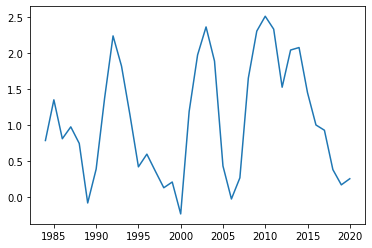

In [338]:
us_treasury = pd.read_csv('US macro data/Treasury_Bills.csv')

spread = us_treasury[us_treasury.columns[[0,5,9]]]

spread.columns = ['date','2yr_yield','10yr_yield']

spread = spread[5:]#.reset_index()

spread['2yr_yield'] = pd.to_numeric(spread['2yr_yield'], errors = 'coerce')
spread['10yr_yield'] = pd.to_numeric(spread['10yr_yield'], errors = 'coerce')

spread['year'] = spread['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)

spread1 = spread.groupby(['year'])[['2yr_yield','10yr_yield']].mean().reset_index()

spread1['spread'] = spread1['10yr_yield'] - spread1['2yr_yield']

plt.plot(spread1.year, spread1.spread)

In [339]:
# merge with market data
feature_final = pd.merge(feature, market, how = 'left', left_on = 'fyear', right_on = 'year', suffixes = ('','_2'))
feature_final.drop(columns = ['year'], inplace = True)
# merge with yield spread
feature_final = pd.merge(feature_final, spread1[['year','spread']], how = 'left',left_on = 'fyear', right_on = 'year', suffixes = ('','_2'))
feature_final.drop(columns = ['year'], inplace = True)

In [340]:
feature_final

,LPERMNO,sic,fyear,oancf/sale,ebitda/sale,gp/sale,ros,gross_margin,oancf/seq,oancf/at,ebit/seq,ebit/at,ebitda/at,roe,roa,xint/sale,effective_tax_rate,fin_lev,dltt/seq,dltt/at,wcap/at,ch/at,at/lt,lt/at,invt/at,asset_turnover,invt_turnover,invt/sale,receivable_turnover,payable_turnover,bankrupt,bankrupt_year,CPI,GDP,inflation,unemployment,spread
0,10015,Retail Trade,1985.0,NaN,0.134708,0.748504,0.047883,0.748504,NaN,NaN,0.402490,0.132624,0.183492,0.197941,0.065223,0.032083,0.454699,3.034809,0.915015,0.301507,-0.187182,0.042740,1.491447,0.670490,0.018711,1.362147,18.308525,0.013737,1855.103448,24.531692,0.0,1986.0,107.60,4339.0,0.0356,0.072,1.352097
1,10031,Retail Trade,1985.0,NaN,0.042871,0.427054,0.009757,0.427054,NaN,NaN,0.098725,0.047034,0.074124,0.035409,0.016869,0.011286,0.387013,2.099025,0.702476,0.334668,0.405763,0.000357,1.909898,0.523588,0.791351,1.729021,1.251829,0.457687,21.791892,22.130833,0.0,1989.0,107.60,4339.0,0.0356,0.072,1.352097
2,10031,Retail Trade,1986.0,NaN,0.067809,0.473422,0.021841,0.473422,NaN,NaN,0.259185,0.132524,0.168792,0.106329,0.054367,0.012339,0.465993,1.955752,0.502816,0.257096,0.267489,0.016523,2.046296,0.488688,0.792746,2.489236,1.653464,0.318470,47.031088,28.588976,0.0,1989.0,109.60,4579.6,0.0186,0.070,0.812360
3,10031,Retail Trade,1987.0,-0.026421,0.002971,0.363770,0.004979,0.363770,-0.129138,-0.061526,-0.052990,-0.025246,0.006919,0.024336,0.011595,0.013438,0.421169,2.098914,0.716734,0.341479,0.301906,0.029610,1.909989,0.523563,0.743174,2.328637,1.993541,0.319146,29.507109,52.392707,0.0,1989.0,113.60,4855.2,0.0365,0.062,0.977040
4,10031,Retail Trade,1988.0,-0.064009,-0.112168,0.337966,-0.238905,0.337966,10.824742,-0.128993,22.536082,-0.268550,-0.226044,40.402062,-0.481450,0.022159,0.088499,-83.917526,-0.536082,0.006388,-0.052243,0.018550,0.988224,1.011916,0.717445,2.015233,1.859589,0.356011,15.273743,10.896048,0.0,1989.0,118.30,5236.4,0.0414,0.055,0.747600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226564,17676,Manufacturing,2018.0,0.155177,0.208077,0.439646,0.104265,0.439646,0.127833,0.075450,0.135276,0.079843,0.101171,0.085892,0.050695,0.014095,0.141049,1.694280,0.345800,0.204099,0.173834,0.034924,2.440341,0.409779,0.066466,0.486217,4.099141,0.136700,6.493400,11.875536,0.0,2019.0,251.11,20580.2,0.0240,0.039,0.384177
226565,17676,Manufacturing,2019.0,0.152586,0.207123,0.436751,0.101044,0.436751,0.129720,0.072474,0.138746,0.077517,0.098377,0.085902,0.047993,0.020281,0.134810,1.789894,0.403896,0.225654,0.152677,0.022930,2.265993,0.441308,NaN,0.474969,NaN,NaN,6.592881,11.779797,0.0,2019.0,255.66,21429.0,0.0180,0.037,0.172600
226566,17884,"Transportation, Communications, Electric, Gas ...",2018.0,-0.117109,-0.008253,0.078952,-0.064699,0.078952,-0.127725,-0.083462,-0.057859,-0.037808,-0.005882,-0.070563,-0.046110,0.020428,-0.072152,1.530333,0.328656,0.214761,0.207772,0.074835,2.885608,0.346547,0.024219,0.712687,27.103680,0.033982,4.746303,14.263525,0.0,2019.0,251.11,20580.2,0.0240,0.039,0.384177
226567,18313,"Transportation, Communications, Electric, Gas ...",2018.0,0.354754,0.502117,0.958991,0.094832,0.958991,0.260362,0.114887,0.157240,0.069384,0.162611,0.069599,0.030711,0.088000,0.000000,2.266237,1.006560,0.444155,-0.166120,0.041008,1.789742,0.558740,0.001449,0.323851,9.168614,0.004473,50.670072,37.470901,0.0,2019.0,251.11,20580.2,0.0240,0.039,0.384177


In [341]:
feature_final.replace([np.inf, -np.inf], np.nan, inplace = True)
feature_final.dropna(inplace = True)
feature_final.describe()

,LPERMNO,fyear,oancf/sale,ebitda/sale,gp/sale,ros,gross_margin,oancf/seq,oancf/at,ebit/seq,ebit/at,ebitda/at,roe,roa,xint/sale,effective_tax_rate,fin_lev,dltt/seq,dltt/at,wcap/at,ch/at,at/lt,lt/at,invt/at,asset_turnover,invt_turnover,invt/sale,receivable_turnover,payable_turnover,bankrupt,bankrupt_year,CPI,GDP,inflation,unemployment,spread
count,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000,106173.000000
mean,61198.004596,2001.468377,-0.557887,-0.704337,-0.131168,-0.989689,-0.131168,0.168288,0.032683,0.104498,0.015348,0.063046,-0.462428,-0.040255,0.081300,0.208722,4.532024,2.003624,0.195119,0.966550,0.111233,2.863520,0.528055,0.151001,1.163776,30.014217,0.182230,18.729315,23.637318,0.027116,2010.757208,180.103691,11172.646388,0.026820,0.057873,1.065195
std,27896.705301,8.687303,20.680128,39.622688,34.860077,45.848019,34.860077,53.255668,0.228237,61.271056,0.286785,0.278611,123.836015,0.489755,3.704620,6.559759,378.712311,283.356863,0.211399,44.261773,0.139793,4.220310,0.373193,0.141289,0.874703,905.931896,2.685678,200.318085,748.776273,0.162423,8.762383,38.210075,4384.095642,0.011536,0.014068,0.834786
min,10001.000000,1987.000000,-2883.600000,-10514.666667,-9833.333333,-10320.500000,-9833.333333,-13390.000000,-8.298716,-16772.000000,-24.803371,-24.794944,-31837.000000,-100.014002,-16.000000,-1245.000000,-5339.580645,-2550.209677,0.000000,-2388.750000,-0.069190,0.015944,0.001526,-0.014501,-0.214078,-70.123369,-121.526316,-10.296089,-58.238095,0.000000,1986.000000,113.600000,4855.200000,-0.004000,0.037000,-0.230637
25%,37058.000000,1994.000000,0.005959,0.035963,0.217524,-0.033447,0.217524,0.012337,0.007307,0.006221,0.002650,0.046203,-0.057619,-0.032555,0.004670,0.001164,1.446789,0.011464,0.016201,0.059449,0.018443,1.487976,0.335326,0.034513,0.600040,3.103157,0.049337,4.821095,9.105506,0.000000,2003.000000,148.200000,7287.200000,0.021000,0.047000,0.363080
50%,76089.000000,2000.000000,0.066985,0.103767,0.334871,0.029186,0.334871,0.155055,0.070765,0.153435,0.067151,0.109618,0.078915,0.031935,0.014547,0.292195,2.004479,0.277536,0.153414,0.190231,0.058774,1.934711,0.516873,0.114508,1.002039,5.463918,0.115772,6.613211,13.735089,0.000000,2014.000000,172.200000,10252.300000,0.028000,0.055000,1.003240
75%,83445.000000,2008.000000,0.135963,0.182085,0.479785,0.075196,0.479785,0.279049,0.122824,0.272029,0.117087,0.164407,0.156624,0.073061,0.034896,0.377877,2.910375,0.781873,0.303115,0.383042,0.148502,2.982169,0.672054,0.223886,1.504301,13.137521,0.190860,9.943762,20.925587,0.000000,2019.000000,214.540000,14451.900000,0.032000,0.062000,1.889840
max,93436.000000,2019.000000,366.947368,358.210526,358.210526,983.659794,358.210526,8103.375000,2.501983,7305.250000,1.878098,1.984002,7770.333333,21.789094,722.000000,1036.500000,87702.500000,75264.250000,7.952884,11629.500000,0.995550,655.166667,62.721120,0.906054,50.246850,272342.000000,762.166667,47246.000000,226075.000000,1.000000,2019.000000,255.660000,21429.000000,0.054000,0.096000,2.511713


In [342]:
feature_final

,LPERMNO,sic,fyear,oancf/sale,ebitda/sale,gp/sale,ros,gross_margin,oancf/seq,oancf/at,ebit/seq,ebit/at,ebitda/at,roe,roa,xint/sale,effective_tax_rate,fin_lev,dltt/seq,dltt/at,wcap/at,ch/at,at/lt,lt/at,invt/at,asset_turnover,invt_turnover,invt/sale,receivable_turnover,payable_turnover,bankrupt,bankrupt_year,CPI,GDP,inflation,unemployment,spread
3,10031,Retail Trade,1987.0,-0.026421,0.002971,0.363770,0.004979,0.363770,-0.129138,-0.061526,-0.052990,-0.025246,0.006919,0.024336,0.011595,0.013438,0.421169,2.098914,0.716734,0.341479,0.301906,0.029610,1.909989,0.523563,0.743174,2.328637,1.993541,0.319146,29.507109,52.392707,0.0,1989.0,113.60,4855.2,0.0365,0.062,0.977040
4,10031,Retail Trade,1988.0,-0.064009,-0.112168,0.337966,-0.238905,0.337966,10.824742,-0.128993,22.536082,-0.268550,-0.226044,40.402062,-0.481450,0.022159,0.088499,-83.917526,-0.536082,0.006388,-0.052243,0.018550,0.988224,1.011916,0.717445,2.015233,1.859589,0.356011,15.273743,10.896048,0.0,1989.0,118.30,5236.4,0.0414,0.055,0.747600
9,54594,Wholesale Trade,1988.0,0.000231,0.125630,0.254218,0.061064,0.254218,0.000548,0.000264,0.260024,0.125186,0.143244,0.144621,0.069626,0.019217,0.329605,2.077113,0.149825,0.072131,0.317315,0.012809,1.928408,0.518562,0.393705,1.140208,2.159857,0.345292,4.267680,11.271809,0.0,2019.0,118.30,5236.4,0.0414,0.055,0.747600
10,54594,Wholesale Trade,1989.0,0.043543,0.121454,0.242639,0.057668,0.242639,0.102196,0.049858,0.247172,0.120588,0.139071,0.135348,0.066032,0.022453,0.327611,2.049724,0.381587,0.186165,0.415694,0.010409,1.952632,0.512129,0.417349,1.145048,2.077910,0.364482,4.753903,12.405538,0.0,2019.0,124.00,5641.6,0.0482,0.053,-0.078680
11,54594,Wholesale Trade,1990.0,0.079073,0.089932,0.215419,0.031725,0.215419,0.190378,0.097092,0.173916,0.088697,0.110425,0.076381,0.038954,0.021591,0.306777,1.960790,0.355835,0.181475,0.405477,0.004087,2.040810,0.490002,0.410922,1.227878,2.344411,0.334660,5.113461,13.284604,0.0,2019.0,130.70,5963.1,0.0540,0.056,0.390880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226558,15904,Manufacturing,2017.0,-1.704835,-1.779161,0.878101,-2.114311,0.878101,-0.373543,-0.263143,-0.463645,-0.326616,-0.274615,-0.463262,-0.326346,0.021889,0.072982,1.419543,0.178373,0.125655,1.345170,0.268248,3.383548,0.295548,0.019116,0.154351,0.984289,0.123845,1.993600,3.346029,0.0,2019.0,245.12,19519.4,0.0210,0.044,0.930280
226564,17676,Manufacturing,2018.0,0.155177,0.208077,0.439646,0.104265,0.439646,0.127833,0.075450,0.135276,0.079843,0.101171,0.085892,0.050695,0.014095,0.141049,1.694280,0.345800,0.204099,0.173834,0.034924,2.440341,0.409779,0.066466,0.486217,4.099141,0.136700,6.493400,11.875536,0.0,2019.0,251.11,20580.2,0.0240,0.039,0.384177
226566,17884,"Transportation, Communications, Electric, Gas ...",2018.0,-0.117109,-0.008253,0.078952,-0.064699,0.078952,-0.127725,-0.083462,-0.057859,-0.037808,-0.005882,-0.070563,-0.046110,0.020428,-0.072152,1.530333,0.328656,0.214761,0.207772,0.074835,2.885608,0.346547,0.024219,0.712687,27.103680,0.033982,4.746303,14.263525,0.0,2019.0,251.11,20580.2,0.0240,0.039,0.384177
226567,18313,"Transportation, Communications, Electric, Gas ...",2018.0,0.354754,0.502117,0.958991,0.094832,0.958991,0.260362,0.114887,0.157240,0.069384,0.162611,0.069599,0.030711,0.088000,0.000000,2.266237,1.006560,0.444155,-0.166120,0.041008,1.789742,0.558740,0.001449,0.323851,9.168614,0.004473,50.670072,37.470901,0.0,2019.0,251.11,20580.2,0.0240,0.039,0.384177


In [343]:
feature_final.to_csv('cleaned_and_merged_data.csv', index_label = False)